In [1]:
import pandas as pd
import numpy as np
import os
pd.__version__

'0.25.0'

In [2]:
import zipfile
archive = zipfile.ZipFile('/home/oleh/Test/Reviews.csv.zip', 'r')
#imgdata = archive.read('img_01.png')
df = pd.read_csv('/home/oleh/Test/Reviews.csv.zip', compression='zip')

print (df.shape)
df.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
from fastai.collab import *

In [4]:
data = CollabDataBunch.from_df(df, user_name='UserId', item_name='ProductId', rating_name='Score', seed=42)

In [5]:
max_Score = df['Score'].max()
min_Score = df['Score'].min()

In [6]:
learn = collab_learner(data, n_factors=30, y_range=[min_Score, max_Score], wd=1e-1, emb_drop=0.2)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


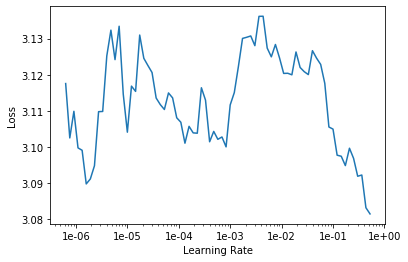

In [7]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [8]:
learn.fit_one_cycle(5, 1e-1)
#learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,time
0,2.535182,2.523302,12:10
1,2.575331,2.556572,23:59
2,2.480934,2.499171,27:22
3,2.324499,2.297926,24:49
4,2.106846,2.079880,57:03


In [9]:
learn.predict(df.iloc[100])

(FloatItem 3.107274, tensor(3.1073), tensor(3.1073))

In [11]:
user = 'A1SYSKR79LA2CB'

In [12]:
import tqdm
 
def get_recomendation(user, data, n=5):
    if not user in data['UserId'].unique():
        _df = data.groupby('ProductId')['Score'].sum().to_frame()
        _df.reset_index(level=0, inplace=True)
        return _df.nlargest(n, 'Score')
    items =  data.loc[data['UserId'] != user, 'ProductId'].unique().tolist()
    pred = np.zeros(len(items))
    for j,i in tqdm.tqdm(enumerate(items)):
        _x = {'UserId':user, 'ProductId':i}
        pred[j] = learn.predict(_x)[1].detach().numpy()
    _df = pd.DataFrame()
    _df['ProductId'] = items
    _df['Score'] = pred
    return _df.nlargest(n, 'Score')

In [13]:
%time  get_recomendation(user, df) # known user

74257it [1:31:47, 13.48it/s]

CPU times: user 1h 32min, sys: 8.6 s, total: 1h 32min 9s
Wall time: 1h 31min 47s


,ProductId,Score
33163,B000NMJWZO,4.438573
24132,B001EO5Q64,4.262442
19703,B000GAT6NG,4.245953
73684,B007JFMH8M,4.239056
47265,B003B3OOPA,4.229408


In [14]:
user_un = 'A1SYSK2CB'
%time  get_recomendation(user_un, df) # Unknown user

CPU times: user 174 ms, sys: 4 ms, total: 178 ms
Wall time: 177 ms


,ProductId,Score
71170,B007JFMH8M,4184
46205,B003B3OOPA,2953
37898,B0026RQTGE,2900
42257,B002QWHJOU,2900
42263,B002QWP89S,2900


#### Second way

In [15]:
u_id, i_id =data.train_ds.x.classes.values()
user_dict = {v:k for k,v in enumerate(u_id)}
prod_dict = {v:k for k,v in enumerate(i_id)}

In [16]:
user_dict

{'#na#': 0,
 '#oc-R103C0QSV1DF5E': 1,
 '#oc-R109MU5OBBZ59U': 2,
 '#oc-R10LFEMQEW6QGZ': 3,
 '#oc-R10LT57ZGIB140': 4,
 '#oc-R10UA029WVWIUI': 5,
 '#oc-R115TNMSPFT9I7': 6,
 '#oc-R119LM8D59ZW8Y': 7,
 '#oc-R11D9D7SHXIJB9': 8,
 '#oc-R11D9LKDAN5NQJ': 9,
 '#oc-R11DNU2NBKQ23Z': 10,
 '#oc-R11O5J5ZVQE25C': 11,
 '#oc-R11PW3CFBB4BEP': 12,
 '#oc-R120LO6OLNDPCG': 13,
 '#oc-R12KPBODL2B5ZD': 14,
 '#oc-R12MGTQS5KZZRV': 15,
 '#oc-R12N3533IO3B79': 16,
 '#oc-R13EBF129DBX88': 17,
 '#oc-R13NNUL4EKL4FL': 18,
 '#oc-R13X3YIJ6GLT0C': 19,
 '#oc-R1493EDK6REQ02': 20,
 '#oc-R14VLCY75KIBSB': 21,
 '#oc-R14ZSRYW2YB41B': 22,
 '#oc-R14ZUK54VMOGJS': 23,
 '#oc-R1522DF2LUL4G1': 24,
 '#oc-R152UR09M996EM': 25,
 '#oc-R15343ZW0UTLMR': 26,
 '#oc-R155JB2SA58E17': 27,
 '#oc-R15LBVAVIE5O2X': 28,
 '#oc-R15OCG1KF51S4F': 29,
 '#oc-R162D7S0A880MV': 30,
 '#oc-R163CP16SRRI50': 31,
 '#oc-R1669TSD0WO7EP': 32,
 '#oc-R16HPROGAO1HS6': 33,
 '#oc-R1730HL4795MHX': 34,
 '#oc-R1791MZMDMM68R': 35,
 '#oc-R17KN3F3UGQSU0': 36,
 '#oc-R18VQWFOMHGFVE': 37

#### Known user or unknown user

In [17]:
print('UserId',user)
u_idx = user_dict.get(user, None)
u_idx
#learn.model.u_weight.weight.detach()

UserId A1SYSKR79LA2CB


46735

In [18]:
%%time
if u_idx is None:
    use_emb = learn.model.u_weight.weight.detach().mean(0)
    use_bias = learn.model.u_bias.weight.detach().mean()
    print('Unknown user')
else:
    use_emb = learn.model.u_weight.weight.detach()[u_idx]
    use_bias = learn.model.u_bias.weight.detach()[u_idx]
    print('User', user)
rating = (torch.matmul(learn.model.i_weight.weight.detach(), use_emb) +
          learn.model.i_bias.weight.detach().reshape(-1) +
          use_bias) 


item_mean_user = pd.DataFrame()
item_mean_user['ProductId'] = i_id
item_mean_user['Score'] = rating.cpu().numpy()

item_mean_user.nlargest(5, 'Score')

User A1SYSKR79LA2CB
CPU times: user 145 ms, sys: 4 ms, total: 149 ms
Wall time: 275 ms


,ProductId,Score
15716,B000NMJWZO,1.812329
26507,B001EO5Q64,1.486886
10402,B000GAT6NG,1.459709
64899,B007JFMH8M,1.448476
42652,B003B3OOPA,1.432895


In [19]:
print('UserId',user_un)
u_idx = user_dict.get(user_un, None)
u_idx
#learn.model.u_weight.weight.detach()

UserId A1SYSK2CB


In [20]:
%%time
if u_idx is None:
    use_emb = learn.model.u_weight.weight.detach().mean(0)
    use_bias = learn.model.u_bias.weight.detach().mean()
    print('Unknown user')
else:
    use_emb = learn.model.u_weight.weight.detach()[u_idx]
    use_bias = learn.model.u_bias.weight.detach()[u_idx]
    print('User', user)
rating = (torch.matmul(learn.model.i_weight.weight.detach(), use_emb) +
          learn.model.i_bias.weight.detach().reshape(-1) +
          use_bias) 


item_mean_user = pd.DataFrame()
item_mean_user['ProductId'] = i_id
item_mean_user['Score'] = rating.cpu().numpy()

item_mean_user.nlargest(5, 'Score')

Unknown user
CPU times: user 219 ms, sys: 4.01 ms, total: 223 ms
Wall time: 67.4 ms


,ProductId,Score
15716,B000NMJWZO,1.783365
64899,B007JFMH8M,1.448414
26507,B001EO5Q64,1.440139
42652,B003B3OOPA,1.403105
45307,B003QDRJXY,1.374374


In [21]:
l_p_id = (df[df['UserId'] == user]['ProductId']).tolist()
item_mean_user[item_mean_user['ProductId'].isin(l_p_id)]

,ProductId,Score
5557,B0009CIVPK,0.023229
16182,B000OGPIUM,-0.009436
16684,B000PKFZ0A,0.031738
16699,B000PKMN14,0.146852
22033,B00154J5OC,0.008006
23032,B0017JFXZA,-0.017864
40366,B002Y1CVZU,0.108140
53381,B004K2IHUO,0.067486
63039,B006L4FMR0,0.038562
63040,B006L4FNB0,0.119868


In [23]:
df[df['UserId'] == user][['ProductId', 'Score']]

,ProductId,Score
100,B004K2IHUO,5
230449,B006L4FNB0,5
244219,B0017JFXZA,3
335517,B009AVD282,5
354908,B002Y1CVZU,5
367300,B000PKFZ0A,3
456314,B00815FR68,5
469514,B000PKMN14,5
470117,B006L4FMR0,5
484458,B000OGPIUM,1


In [24]:
df.iloc[100]

Id                                                                      101
ProductId                                                        B004K2IHUO
UserId                                                       A1SYSKR79LA2CB
ProfileName                         Mycroft "Virture is its own punishment"
HelpfulnessNumerator                                                      4
HelpfulnessDenominator                                                    5
Score                                                                     5
Time                                                             1233014400
Summary                                      Taste wise it is a 6 star item
Text                      The mouth says, "How do I love thee, let me co...
Name: 100, dtype: object

In [25]:
df['Score'].mean()

4.183198640523243

#### to solve items task  need to convert the functions to items

In [48]:
file_name = 'colobarative'
learn.save(os.path.join(os.getcwd(), file_name))


In [55]:
df.groupby('ProductId')['Score'].mean()

ProductId
0006641040    4.351351
141278509X    5.000000
2734888454    3.500000
2841233731    5.000000
7310172001    4.751445
                ...   
B009UOFTUI    1.000000
B009UOFU20    1.000000
B009UUS05I    5.000000
B009WSNWC4    5.000000
B009WVB40S    5.000000
Name: Score, Length: 74258, dtype: float64